# Q1K Data Loss reports

In [70]:
# Import modules
import os
import pandas as pd
from pathlib import Path
import numpy as np
import glob
import shutil
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import plotly.io as pio
from matplotlib.gridspec import GridSpec

import docx
from docx.enum.section import WD_ORIENT
from docx.enum.section import WD_SECTION
from docx.enum.text import WD_ALIGN_PARAGRAPH
pio.renderers.default = "plotly_mimetype+notebook"
from docx.shared import Pt
import seaborn as sns
import kaleido
#import openpyxl

## Select date

In [82]:
date = "2025_05_20"
date_last_updated="2025_04_24"

In [83]:
# last day of EEG data uplaod MNI using DD/MM/YYY format used in REDCap
mni_upload_date= "2025-05-18"

# last date of EEG data uplaod HSJ  using DD/MM/YYY format used in REDCap
hsj_upload_date= "2025-05-18"

In [84]:
task = "RS"

# Import data tracking files

### Create a word document object


In [97]:
doc = docx.Document()

# Add a blank paragraph to push the heading to the middle of the page
for _ in range(10):  # Adjust this number to position the heading vertically
    doc.add_paragraph()

# Add the heading
heading = doc.add_paragraph()
heading_run = heading.add_run(f"Q1K Participant Data Loss Report for {task} {date}")
heading_run.bold = True
heading_run.font.size = Pt(20)  # Set font size
heading_run.font.name = 'Arial'  # Set font type


# Center align the heading
heading_run.alignment = WD_ALIGN_PARAGRAPH.CENTER

# Add new doc section with landscape orientation
section = doc.add_section()
section.start_type = WD_SECTION.ODD_PAGE
new_width, new_height = section.page_height, section.page_width
section.orientation = WD_ORIENT.LANDSCAPE
section.page_width = new_width

In [98]:
for file in glob.glob(f"../source/demographics_redcap/{date_last_updated}/*"):
    if "Data_tracking" in file:
        sharepoint_tracking_df = pd.read_csv(file)
        print( "Sharepoint tracking file is: " , file)

for file in glob.glob(f"../output_dfs/missingness/{date}/RS/eeg_pipeline/*"):
    if "Data_tracking" in file:
        updated_tracking_df = pd.read_csv(file)
        print( "New sharepoint tracking file is: " , file)


Sharepoint tracking file is:  ../source/demographics_redcap/2025_04_24/Data_tracking_RS_detailed_2025_04_08.csv
New sharepoint tracking file is:  ../output_dfs/missingness/2025_05_20/RS/eeg_pipeline/Data_tracking_RS_detailed_2025_05_20.csv


### Plot top sources of data loss

/tmp/ipykernel_1726834/1211626937.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




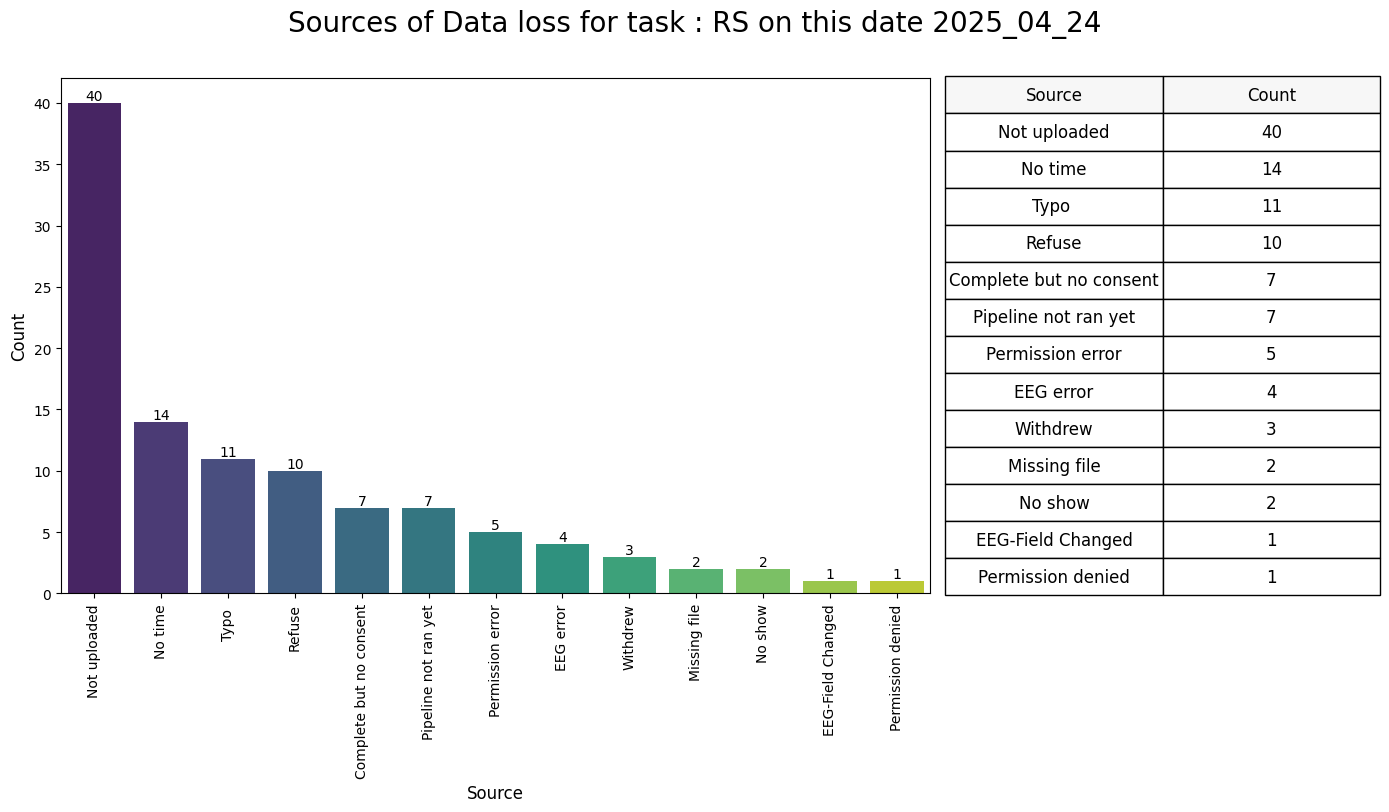

In [99]:

# Get sorted value counts
value_counts = sharepoint_tracking_df.loc[sharepoint_tracking_df.Reason != "Successful"]['Reason'].value_counts().sort_values(ascending=False)

df_counts = value_counts.reset_index()
df_counts.columns = ['Source', 'Count']  # Rename columns for table display

# Create figure with subplots
fig = plt.figure(figsize=(14, 8))
gs = GridSpec(1, 2, width_ratios=[2, 1])  # 2:1 width ratio

# Left subplot: Bar chart
ax1 = fig.add_subplot(gs[0])
sns.barplot(data=df_counts, x='Source', y='Count', ax=ax1, palette='viridis')

# Add counts on bars
for p in ax1.patches:
    ax1.annotate(f"{p.get_height():.0f}", 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

ax1.set_xlabel('Source', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
plt.sca(ax1)
plt.xticks(rotation=90)

# Right subplot: Table
ax2 = fig.add_subplot(gs[1])
ax2.axis('off')  # Hide axes

# Create table
table = ax2.table(cellText=df_counts.values,
                 colLabels=df_counts.columns,
                 loc='center',
                 cellLoc='center',
                 colColours=['#f7f7f7']*2)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2.66)  # Adjust cell padding

# Styling
plt.suptitle(f"Sources of Data loss for task : {task} on this date {date_last_updated}", fontsize=20, y=1.01)
plt.tight_layout()
plt.show()

In [100]:
value_counts

Reason
Not uploaded               40
No time                    14
Typo                       11
Refuse                     10
Complete but no consent     7
Pipeline not ran yet        7
Permission error            5
EEG error                   4
Withdrew                    3
Missing file                2
No show                     2
EEG-Field Changed           1
Permission denied           1
Name: count, dtype: int64

In [101]:
sharepoint_tracking_df

,q1k_ID,et_id,bids_id,record_id,DOB,site,sex,EEG-ET visit date,eeg_age,discrepancy,...,BIDS,Pylossless,ET_sync_loss,Segmentation,Autoreject,Last_stage,Manual Check,Reason,Further details,Fixed
0,Q1K_MHC_20042_P,Q042_P,0042P,42,1993-08-19,mni,NaN,2024-08-09,30.973942,False,...,Yes,Yes,Yes,Yes,Yes,Completed,Yes,Complete but no consent,Physical form,NaN
1,Q1K_HSJ_10043_F1,Q043_F1,0043F1,45,1966-04-13,hsj,Male,2024-05-31,58.133865,False,...,Yes,Yes,Yes,Yes,Yes,Completed,Yes,Successful,NaN,NaN
2,Q1K_HSJ_10043_P,NaN,0043P,43,2007-05-02,hsj,Male,2024-03-28,16.906576,False,...,Yes,Yes,Yes,Yes,Yes,Completed,Yes,Successful,NaN,NaN
3,Q1K_HSJ_10050_M1,Q050_M1,0050M1,63,1987-04-23,hsj,Female,2024-05-27,37.095902,False,...,Yes,Yes,Yes,Yes,Yes,Completed,Yes,Successful,NaN,NaN
4,Q1K_HSJ_10050_P,Q050_P,0050P,50,2016-05-01,hsj,Female,2024-05-27,8.071350,False,...,Yes,Yes,Yes,Yes,Yes,Completed,Yes,Successful,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Q1K_HSJ_1525-1209_P,Q1209_P,1209P,525-1209,2011-07-07,hsj,Female,2025-03-19,13.700487,False,...,No,No,No,No,No,EEG Attempted,Yes,Not uploaded,NaN,NaN
276,Q1K_HSJ_1525-1212_M1,Q1212_M1,1212M1,525-1213,1999-02-03,hsj,Female,2025-03-06,26.086778,False,...,No,No,No,No,No,EEG Attempted,Yes,Not uploaded,NaN,NaN
277,Q1K_HSJ_1525-1212_P,Q1212_P,1212P,525-1212,2018-04-25,hsj,Female,2025-03-06,6.864047,False,...,No,No,No,No,No,EEG Attempted,Yes,Not uploaded,NaN,NaN
278,Q1K_MHC_200315_M1_,Q315_M1,Q1K_MHC_200315_M1_,316,1973-11-11,mni,Female,2025-04-08,51.406828,False,...,No,No,No,No,No,EEG Attempted,Yes,Not uploaded,NaN,NaN


In [102]:
updated_tracking_df

,q1k_ID,et_id,bids_id,record_id,DOB,site,sex,EEG-ET visit date,eeg_age,discrepancy,...,EEG Visit,EEG Attempted,EEG Raw Files,BIDS,Pylossless,ET_sync_loss,Segmentation,Autoreject,Last_stage,Manual Check
0,Q1K_MHC_20042_P,Q042_P,0042P,42,1993-08-19,mni,NaN,2024-08-09,30.973942,False,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Completed,NaN
1,Q1K_HSJ_10043_F1,Q043_F1,0043F1,45,1966-04-13,hsj,Male,2024-05-31,58.133865,False,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Completed,NaN
2,Q1K_HSJ_10043_P,NaN,0043P,43,2007-05-02,hsj,Male,2024-03-28,16.906576,False,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Completed,NaN
3,Q1K_HSJ_10050_M1,Q050_M1,0050M1,63,1987-04-23,hsj,Female,2024-05-27,37.095902,False,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Completed,NaN
4,Q1K_HSJ_10050_P,Q050_P,0050P,50,2016-05-01,hsj,Female,2024-05-27,8.071350,False,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Completed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,NaN,NaN,NaN,81,NaN,NaN,Female,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,NaN,NaN,NaN,82,NaN,NaN,Male,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,NaN,NaN,NaN,91,NaN,NaN,Female,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417,NaN,NaN,NaN,92,NaN,NaN,Male,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
participants_no_stage= updated_tracking_df.Last_stage.isna()
updated_tracking_df[participants_no_stage]

,q1k_ID,et_id,bids_id,record_id,DOB,site,sex,EEG-ET visit date,eeg_age,discrepancy,...,EEG Visit,EEG Attempted,EEG Raw Files,BIDS,Pylossless,ET_sync_loss,Segmentation,Autoreject,Last_stage,Manual Check
149,Q1K_HSJ_1525-1015_F1,Q1015_F1,1015F1,525-1017,1989-08-24,hsj,NaN,NaN,34.782371,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,NaN,NaN,NaN,102,NaN,NaN,Female,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,NaN,NaN,NaN,119,NaN,NaN,Male,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,NaN,NaN,NaN,127,NaN,NaN,Female,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317,NaN,NaN,NaN,144,NaN,NaN,Male,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,NaN,NaN,NaN,81,NaN,NaN,Female,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,NaN,NaN,NaN,82,NaN,NaN,Male,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,NaN,NaN,NaN,91,NaN,NaN,Female,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417,NaN,NaN,NaN,92,NaN,NaN,Male,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clean up the updated tracking file

In [104]:
participants_no_stage= updated_tracking_df.Last_stage.isna()
participants_eeg_logged_filled = updated_tracking_df[['q1k_ID', 'et_id', 'bids_id', 'DOB', 'site',
       'EEG-ET visit date', 'eeg_age', 'RS_fail_reason',
       'EEG_failed_attempt_reason']].notna().any(axis=1)

# Keep rows where theres no data for the last stage but at least one the EEG log columns was filled out

#updated_tracking_df = updated_tracking_df[~participants_no_stage | (participants_no_stage & participants_eeg_logged_filled)]

updated_tracking_df = updated_tracking_df[participants_eeg_logged_filled]


In [105]:
updated_tracking_df

,q1k_ID,et_id,bids_id,record_id,DOB,site,sex,EEG-ET visit date,eeg_age,discrepancy,...,EEG Visit,EEG Attempted,EEG Raw Files,BIDS,Pylossless,ET_sync_loss,Segmentation,Autoreject,Last_stage,Manual Check
0,Q1K_MHC_20042_P,Q042_P,0042P,42,1993-08-19,mni,NaN,2024-08-09,30.973942,False,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Completed,NaN
1,Q1K_HSJ_10043_F1,Q043_F1,0043F1,45,1966-04-13,hsj,Male,2024-05-31,58.133865,False,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Completed,NaN
2,Q1K_HSJ_10043_P,NaN,0043P,43,2007-05-02,hsj,Male,2024-03-28,16.906576,False,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Completed,NaN
3,Q1K_HSJ_10050_M1,Q050_M1,0050M1,63,1987-04-23,hsj,Female,2024-05-27,37.095902,False,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Completed,NaN
4,Q1K_HSJ_10050_P,Q050_P,0050P,50,2016-05-01,hsj,Female,2024-05-27,8.071350,False,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Completed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,Q1K_HSJ_1525-1261_P,Q1261_P,1261P,525-1261,2017-08-23,hsj,Male,2025-05-08,7.707208,False,...,Yes,Yes,Yes,No,No,No,No,No,EEG Raw Files,NaN
310,Q1K_HSJ_1525-1285_P,Q1285_P,1285P,525-1285,2018-11-22,hsj,Female,2025-05-12,6.469560,False,...,Yes,Yes,Yes,No,No,No,No,No,EEG Raw Files,NaN
311,Q1K_HSJ_1525-1293_P,Q1293_P,1293P,525-1293,1976-07-13,hsj,Male,2025-05-15,48.838785,False,...,Yes,Yes,No,No,No,No,No,No,EEG Attempted,NaN
312,Q1K_MHC_200315_M1_,Q315_M1,Q1K_MHC_200315_M1_,316,1973-11-11,mni,Female,2025-04-08,51.406828,False,...,Yes,Yes,No,No,No,No,No,No,EEG Attempted,NaN


## Identify participants whos data has changed

In [106]:
# Find all the data from the Sharepoint
latest_stage_sharepoint= sharepoint_tracking_df[["q1k_ID","Last_stage", "Reason","Further details", "Fixed"]]
latest_stage_sharepoint.rename(columns={"Last_stage": f"stage_{date}"}, inplace=True)
latest_stage_sharepoint

/tmp/ipykernel_1726834/3532735675.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,q1k_ID,stage_2025_05_20,Reason,Further details,Fixed
0,Q1K_MHC_20042_P,Completed,Complete but no consent,Physical form,NaN
1,Q1K_HSJ_10043_F1,Completed,Successful,NaN,NaN
2,Q1K_HSJ_10043_P,Completed,Successful,NaN,NaN
3,Q1K_HSJ_10050_M1,Completed,Successful,NaN,NaN
4,Q1K_HSJ_10050_P,Completed,Successful,NaN,NaN
...,...,...,...,...,...
275,Q1K_HSJ_1525-1209_P,EEG Attempted,Not uploaded,NaN,NaN
276,Q1K_HSJ_1525-1212_M1,EEG Attempted,Not uploaded,NaN,NaN
277,Q1K_HSJ_1525-1212_P,EEG Attempted,Not uploaded,NaN,NaN
278,Q1K_MHC_200315_M1_,EEG Attempted,Not uploaded,NaN,NaN


In [49]:
# Merge older data tracking and new data tracking
updated_tracking_df["changed"]="No"
changed_df=updated_tracking_df.merge(latest_stage_sharepoint, on ="q1k_ID", how="left")
ids_changed=changed_df["Last_stage"] != (changed_df[f"stage_{date}"])
updated_tracking_df.loc[ids_changed]["changed"]="Yes"

/tmp/ipykernel_1726834/227951566.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
# Initialize changed column
updated_tracking_df = updated_tracking_df.assign(changed="No")

# Merge and compare
changed_df = updated_tracking_df.merge(
    latest_stage_sharepoint,
    on="q1k_ID",
    how="left",
    suffixes=('', '_new')
)

# Find changes (with NaN handling)
ids_changed = (changed_df["Last_stage"] != changed_df[f"stage_{date}"]) | (
    changed_df["Last_stage"].isna() ^ changed_df[f"stage_{date}"].isna()
)

# Update original DataFrame
new_df = changed_df.assign(
    changed=np.where(ids_changed, "Yes", "No")
)



In [51]:
new_df

,q1k_ID,et_id,bids_id,record_id,DOB,site,sex,EEG-ET visit date,eeg_age,discrepancy,...,ET_sync_loss,Segmentation,Autoreject,Last_stage,Manual Check,changed,stage_2025_05_20,Reason,Further details,Fixed
0,Q1K_HSJ_10040_M1,NaN,0040M1,41,1985-01-10,hsj,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
1,Q1K_HSJ_10040_P,NaN,0040P,40,2018-03-17,hsj,Male,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
2,Q1K_MHC_20042_P,Q042_P,0042P,42,1993-08-19,mni,NaN,2024-08-09,30.973942,False,...,Yes,Yes,Yes,Completed,NaN,No,Completed,Complete but no consent,Physical form,NaN
3,Q1K_HSJ_10043_F1,Q043_F1,0043F1,45,1966-04-13,hsj,Male,2024-05-31,58.133865,False,...,Yes,Yes,Yes,Completed,NaN,No,Completed,Successful,NaN,NaN
4,Q1K_HSJ_10043_P,NaN,0043P,43,2007-05-02,hsj,Male,2024-03-28,16.906576,False,...,Yes,Yes,Yes,Completed,NaN,No,Completed,Successful,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Q1K_HSJ_1525-1261_P,Q1261_P,1261P,525-1261,2017-08-23,hsj,Male,2025-05-08,7.707208,False,...,No,No,No,EEG Raw Files,NaN,Yes,NaN,NaN,NaN,NaN
323,Q1K_HSJ_1525-1285_P,Q1285_P,1285P,525-1285,2018-11-22,hsj,Female,2025-05-12,6.469560,False,...,No,No,No,EEG Raw Files,NaN,Yes,NaN,NaN,NaN,NaN
324,Q1K_HSJ_1525-1293_P,Q1293_P,1293P,525-1293,1976-07-13,hsj,Male,2025-05-15,48.838785,NaN,...,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
325,Q1K_MHC_200315_M1_,Q315_M1,Q1K_MHC_200315_M1_,316,1973-11-11,mni,Female,2025-04-08,51.406828,NaN,...,NaN,NaN,NaN,NaN,NaN,Yes,EEG Attempted,Not uploaded,NaN,NaN


In [52]:

# Add automatic classifications
for subject in new_df['q1k_ID'].unique():
    subject_mask = new_df['q1k_ID'] == subject
    subject_df = new_df.loc[subject_mask]
    
    if len(subject_df) <1:
        continue
    
    # Get values for current subject
    last_stage = subject_df['Last_stage'].values[0]  # Get single value
    consent = subject_df['Phase 3 consented'].values[0]
    eeg_visit_date = subject_df['EEG-ET visit date'].values [0]
    site = subject_df['site'].values[0]
    changed_status=subject_df['changed'].values[0]
    
    new_classification = None  # Initialize as None
    
    # Rule 1: Complete but no consent
    #if (last_stage == "Completed") and (consent == "No"):
      #  new_classification = "Complete but no consent"
    
    # Rule 2: Not uploaded (MNI site)
    if (site == "mni") and (pd.notna(eeg_visit_date)) and (eeg_visit_date > mni_upload_date):
        new_classification = "Not uploaded"
    
    # Rule 3: Not uploaded (HSJ site)
    elif (site == "hsj") and (pd.notna(eeg_visit_date)) and (eeg_visit_date > hsj_upload_date):
        new_classification = "Not uploaded"
    
    # Change to not checked yet
    elif (changed_status=="Yes") and (new_classification==None):
        new_classification= "Not checked yet"
        
    # Only update if classification was determined
    if new_classification is not None:
        new_df.loc[subject_mask, 'Reason'] = new_classification
        print(f"Subject {subject}: {new_classification}")

Subject Q1K_HSJ_10040_M1: Not checked yet
Subject Q1K_HSJ_10040_P: Not checked yet
Subject Q1K_HSJ_10053_F1: Not checked yet
Subject Q1K_HSJ_10053_P: Not checked yet
Subject Q1K_HSJ_10056_M1: Not checked yet
Subject Q1K_HSJ_10056_P: Not checked yet
Subject Q1K_HSJ_10056_S1: Not checked yet
Subject Q1K_HSJ_10064_F1: Not checked yet
Subject Q1K_HSJ_10064_P: Not checked yet
Subject Q1K_HSJ_10086_P: Not checked yet
Subject Q1K_HSJ_10086_S1: Not checked yet
Subject Q1K_HSJ_10090_P: Not checked yet
Subject Q1K_HSJ_10093_P: Not checked yet
Subject Q1K_HSJ_10097_F1: Not checked yet
Subject Q1K_HSJ_10097_M1: Not checked yet
Subject Q1K_HSJ_10097_P: Not checked yet
Subject Q1K_HSJ_100114_S1: Not checked yet
Subject Q1K_HSJ_100154_P: Not checked yet
Subject Q1K_MHC_200171_S1: Not checked yet
Subject Q1K_MHC_200196_P: Not checked yet
Subject Q1K_MHC_200212_F1: Not checked yet
Subject Q1K_MHC_200212_P: Not checked yet
Subject Q1K_MHC_200212_S1: Not checked yet
Subject Q1K_MHC_200220_M1: Not checked

/tmp/ipykernel_1726834/4108732497.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




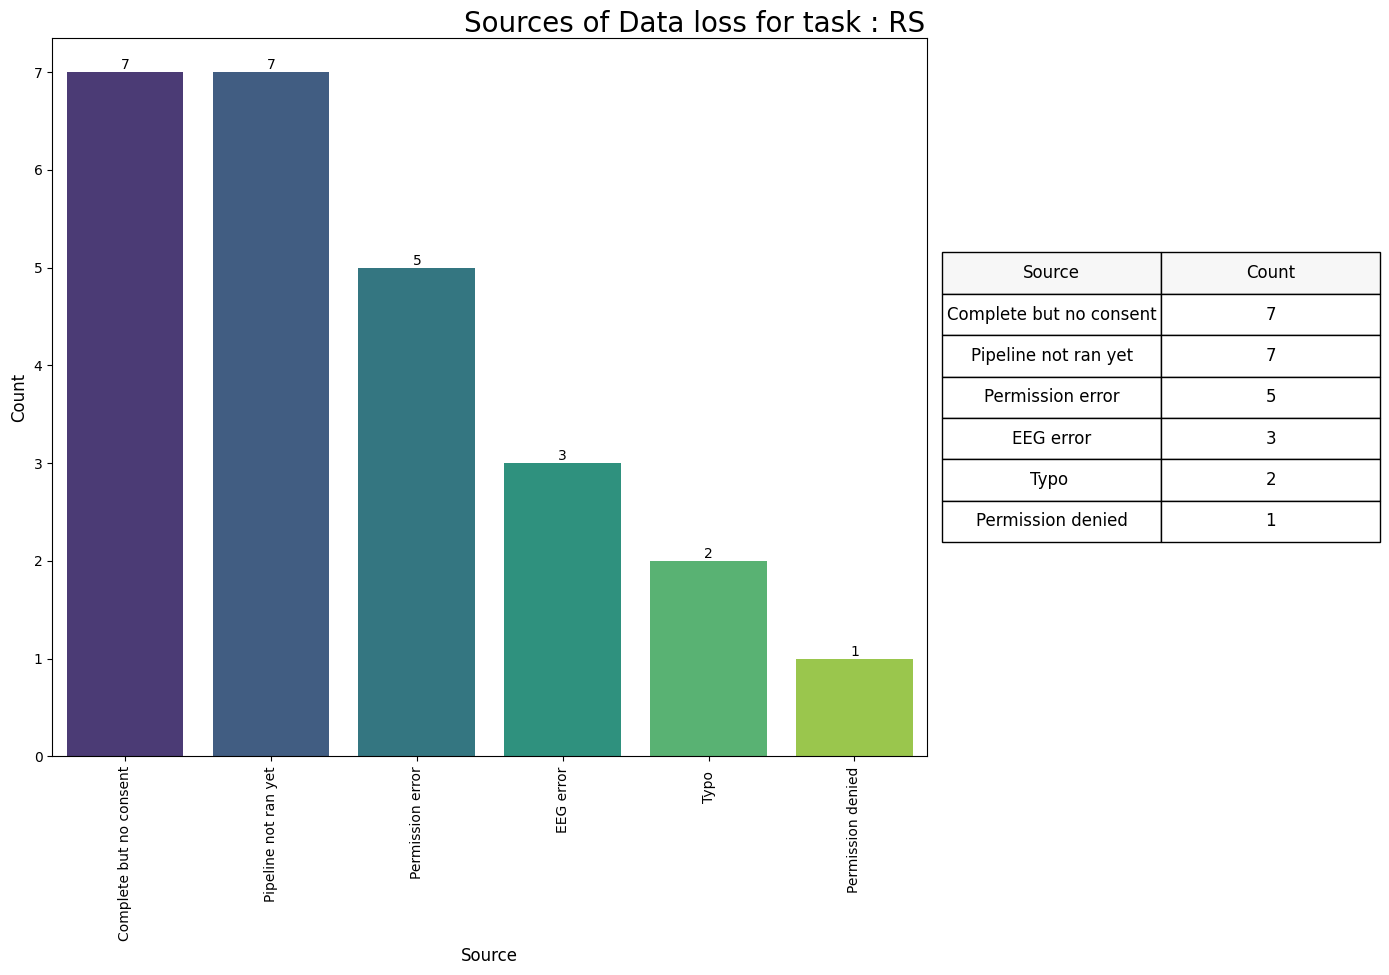

In [53]:

# Get sorted value counts
value_counts = new_df.loc[(new_df.Reason != "Successful") & (new_df.Reason != "Not checked yet")]['Reason'].value_counts().sort_values(ascending=False)

df_counts = value_counts.reset_index()
df_counts.columns = ['Source', 'Count']  # Rename columns for table display

# Create figure with subplots
fig = plt.figure(figsize=(14, 10))
gs = GridSpec(1, 2, width_ratios=[2, 1])  # 2:1 width ratio

# Left subplot: Bar chart
ax1 = fig.add_subplot(gs[0])
sns.barplot(data=df_counts, x='Source', y='Count', ax=ax1, palette='viridis')

# Add counts on bars
for p in ax1.patches:
    ax1.annotate(f"{p.get_height():.0f}", 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

ax1.set_xlabel('Source', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
plt.sca(ax1)
plt.xticks(rotation=90)

# Right subplot: Table
ax2 = fig.add_subplot(gs[1])
ax2.axis('off')  # Hide axes

# Create table
table = ax2.table(cellText=df_counts.values,
                 colLabels=df_counts.columns,
                 loc='center',
                 cellLoc='center',
                 colColours=['#f7f7f7']*2)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2.66)  # Adjust cell padding

# Styling
plt.suptitle(f"Sources of Data loss for task : {task}", fontsize=20, y=0.97)
plt.tight_layout()

# Save the figures as PDF file
plot_dir = f"../figures/data_loss/{date}/dataloss_{date}.pdf"
Path(os.path.dirname(plot_dir)).mkdir(parents=True, exist_ok=True)



plt.savefig(f"../figures/data_loss/{date}/Data_loss_counts_{date}.png")
            
plt.show()

plt.close()

doc.add_heading(f"Data loss for task for task: {task}", level=4)

doc.add_picture(f"../figures/data_loss/{date}/Data_loss_counts_{date}.png", width=docx.shared.Inches(8), height=docx.shared.Inches(5))





In [54]:
# Total number of subjects consented in Phase 2
p1 = f"Total number of participants with EEG visit: {len(new_df)}"
print (p1)
doc.add_paragraph(p1,style='List Bullet')

Total number of participants with EEG visit: 327


In [55]:
# Total number of subjects consented in Phase 2
p3 = f"Total number of participants who suceeded in all stages: {len(new_df[(new_df['Last_stage'] == 'Completed')])}"
print (p3)
doc.add_paragraph(p3,style='List Bullet')

Total number of participants who suceeded in all stages: 186


In [56]:
# Total number of subjects consented in Phase 2
p3 = f"Total number of participants who failed task: {len(new_df[(new_df['Last_stage'] != 'Completed')])}"
print (p3)
doc.add_paragraph(p3,style='List Bullet')

Total number of participants who failed task: 141


In [57]:
# Total number of subjects consented in Phase 2
p4 = f"Total number of participants that need to be checked: {len(new_df[(new_df['changed'] == 'Yes') & (new_df['Reason'] != 'Not uploaded')])}"
print (p4)
doc.add_paragraph(p4,style='List Bullet')

Total number of participants that need to be checked: 129


## Save new classifications

In [58]:
new_df.to_csv(f"../output_dfs/missingness/{date}/RS/Data_loss_report_{task}_{date}.csv", index=False)

In [59]:
doc_dir=f"../word_documents/{date}/"

os.makedirs(doc_dir, exist_ok=True)

doc.save(f"../word_documents/{date}/q1k_data_loss_report_{date}.docx")